### BADASS Analysis: sugars

##### Can we reduce the array of 48 barrels whilst maintaining model accuracy?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, confusion_matrix
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.utils.multiclass import unique_labels

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size
sns.set_style('white')  # Sets default figure aesthetics
sns.set_palette('colorblind')

#### Parse in input data

Large array sugar data

In [3]:
l_sugar_fluor_data = ParseArrayData(
    dir_path='/home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Paper_analysis/Sugars/Large_array',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Paper_analysis/Sugars/Large_array already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite Paper_analysis/Sugars/Large_array?y


Locate xlsx files

In [4]:
l_sugar_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
l_sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/gluam_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/man_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/fru_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/mal_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/glu_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/glu_repeat_2.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/gluam_repeat_2.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/fru_repeat_2.x

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
l_sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: mal, 0 (flagged readings = CCHept-I24T: 0.7235089423170673) 


In [7]:
l_sugar_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   1.090924  0.761905     0.941823     0.953420     0.901014  0.980410   
1   0.922291  1.061644     0.874554     0.901049     0.901821  0.895090   
2   0.984411  0.866242     0.964744     0.927832     0.949204  0.918275   
3   0.957130  1.193182     0.848753     0.871554     0.904407  0.958908   
4   1.043279  0.815217     0.897529     0.964326     1.015679  0.870522   
5   0.942686  0.634146     0.958832     0.958229     0.973239  0.831853   
6   0.910304  0.787097     0.946507     0.920822     0.951738  0.967693   
7   1.065355  0.729032     0.979030     0.945389     0.904783  1.050744   
8   0.957442  0.787356     1.021690     0.991537     1.005895  0.918973   
9   1.010585  0.956311     0.985347     0.962564     0.892610  0.928648   
10  0.896438  0.796380     1.001264     0.955277     0.920431  0.908134   
11  0.933532  0.813433     0.917152     1.034626     0.934390  0.790661   
12  1.059771  1.039106     1.041573     1.029624     1.013708  0.962149   
13  1.033166  0.870370     0.951152     1.029202     0.941163  1.064842   
14  1.027387  0.901639     1.009946     0.974328     0.971336  0.995934   
15  0.941257  0.723404     0.887630     0.926377     0.979108  0.907382   
16  1.064028  0.914894     1.061253     0.992939     0.995103  0.987144   
17  1.071873  0.712871     1.063458     0.915420     1.028948  0.874440   
18  0.928307  1.080000     0.917863     0.918256     0.833694  0.960239   
19  0.987514  0.877778     0.986988     1.059325     1.026094  0.989860   
20  1.099456  1.086331     1.057084     1.010606     0.974457  1.007267   
21  0.992739  0.766497     0.979408     0.893519     0.959103  0.946020   
22  0.978663  0.852041     0.896086     0.934067     0.900254  0.916977   
23  0.861934  0.977401     0.922746     0.881683     0.971275  0.921537   
24  1.007643  1.136842     0.984371     0.942875     0.958499  1.023786   
25  1.027008  0.987421     1.022222     0.988206     0.941795  0.899918   
26  0.967471  1.076923     0.875335     0.936435     0.885511  0.950167   
27  0.979685  1.123810     1.014942     0.996560     0.980422  0.901585   
28  1.003561  1.246269     0.901285     0.977691     0.906919  0.946258   
29  1.065949  0.842105     0.929661     0.971606     0.985371  0.940908   
30  1.025125  0.923913     1.093705     0.977410     0.968770  0.835013   
31  0.927596  0.680982     0.902190     1.060440     0.934179  0.987044   
32  0.874801  1.381356     0.832338     0.915149     0.868800  0.972228   
33  1.073218  1.175879     0.781405     1.004598     0.960390  0.979444   
34  0.827491  1.294118     0.875478     0.907203     0.889089  0.971505   
35  0.920649  0.339806     0.945213     0.829368     0.940705  0.923421   
36  0.940694  0.992063     0.896260     0.907366     0.997346  0.862034   
37  1.072328  0.587097     1.038842     1.097082     0.985564  0.999299   
38  1.055340  0.980000     1.027093     1.023074     1.005902  1.012482   
39  0.982028  1.030864     0.929455     0.860856     0.982105  1.024211   
40  1.081686  1.201342     1.044965     1.023090     0.964595  1.000651   
41  1.022970  0.759804     1.006251     0.906501     0.949419  0.971398   
42  1.050763  0.672414     0.995274     0.907771     0.949867  0.947530   
43  1.071890  1.287500     1.026616     1.082397     1.004300  1.005241   
44  0.913383  0.714286     0.886249     0.978496     0.976694  0.853735   
45  0.948889  0.956522     0.914516     0.936120     0.886286  0.800457   
46  1.035721  1.330709     0.918044     0.990085     0.944822  1.053504   
47  0.922048  0.879518     0.917347     0.841628     0.860733  0.935251   
48  0.977739  0.824000     0.959244     0.935677     0.938273  0.932075   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.946903  0.940008     0.894682     0.958493  ...          1.096279   
1   1.078007  0.942237     0.939607     0.872031  ...          0.978104   
2   0.895280  0.978775     0.9

In [8]:
l_sugar_df = l_sugar_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median value for each feature)

mal


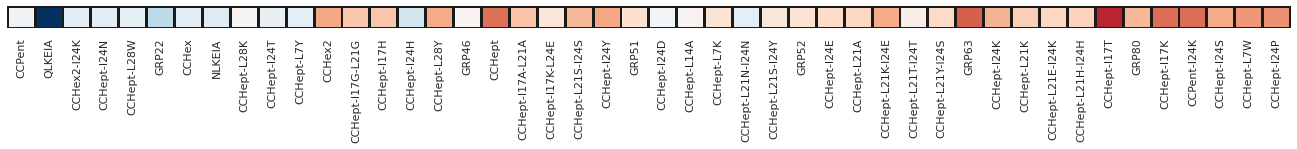

man


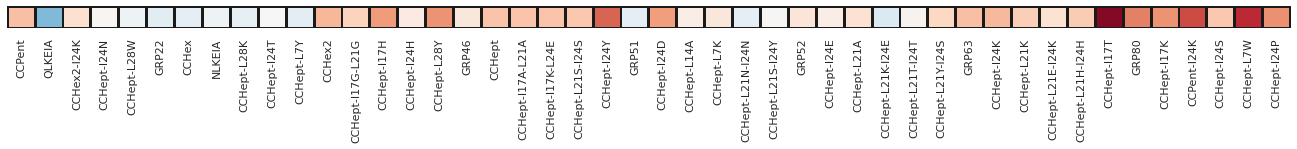

glu


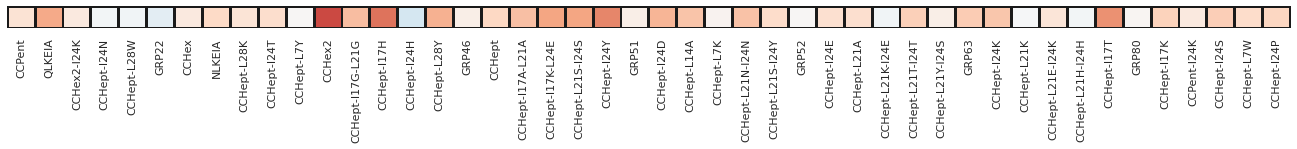

fru


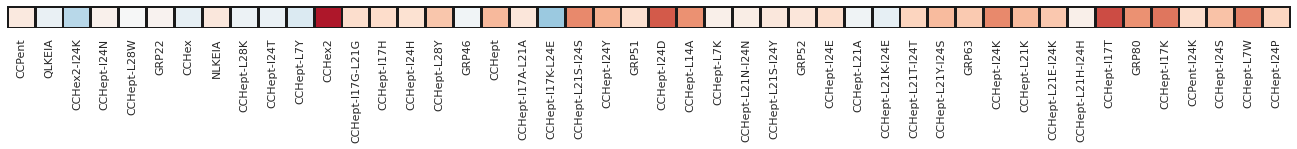

gluam


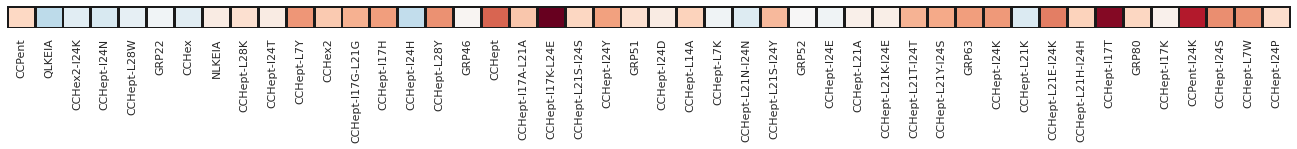

In [9]:
classes = []
for class_name in l_sugar_df['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)

l_sugar_df_x_val = l_sugar_df.drop(['Analyte'], axis=1)
class_median_x_val = []
for class_name in classes:
    class_indices = [n for n in range(l_sugar_df.shape[0]) if l_sugar_df['Analyte'][n] == class_name]
    class_median_x_val.append(np.median(l_sugar_df_x_val.values[class_indices, :], axis=0))

vmin = np.amin(class_median_x_val)
vmax = np.amax(class_median_x_val)

for index, class_name in enumerate(classes):
    print(class_name)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([class_median_x_val[index]]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_sugar_df_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.savefig('{}/{}_median_barrel_readings_heatmap.svg'.format(l_sugar_fluor_data.results_dir, class_name))
    plt.show()

Generates box plots to compare the distribution of values for each class across the 46 features

Fructose


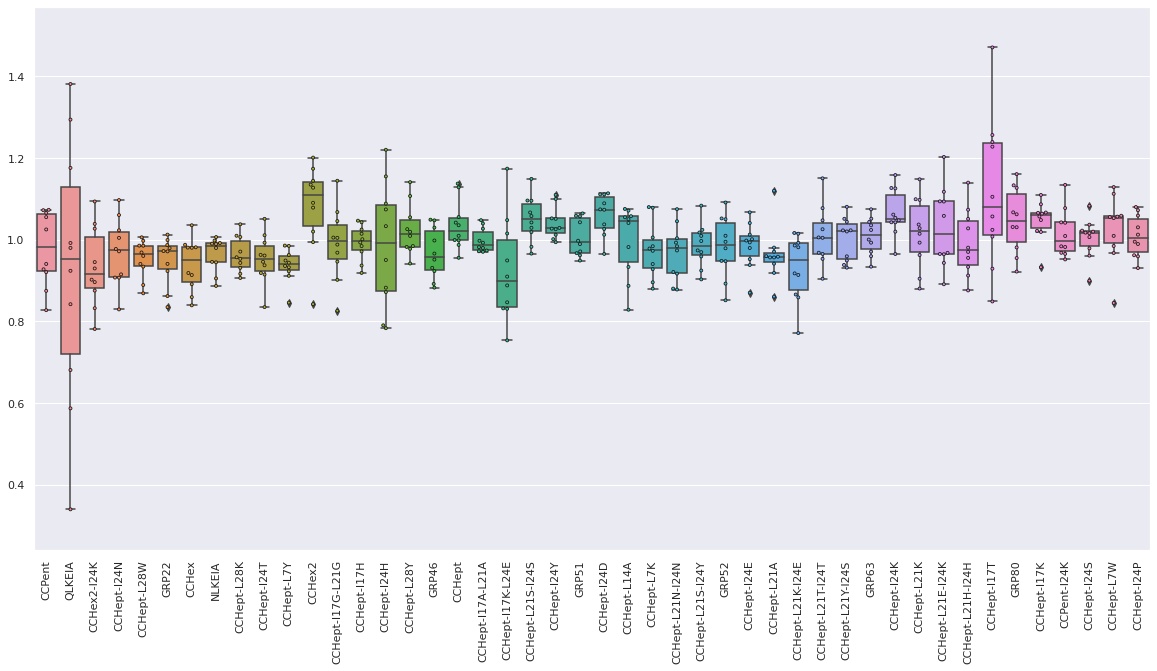

Glucose


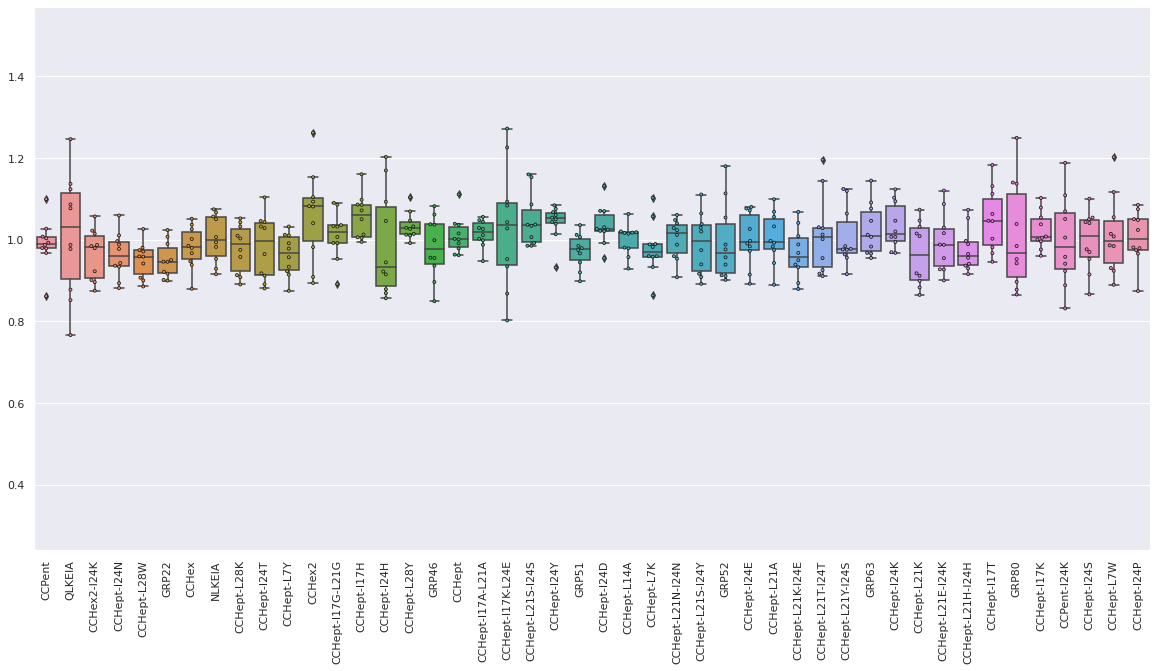

Mannose


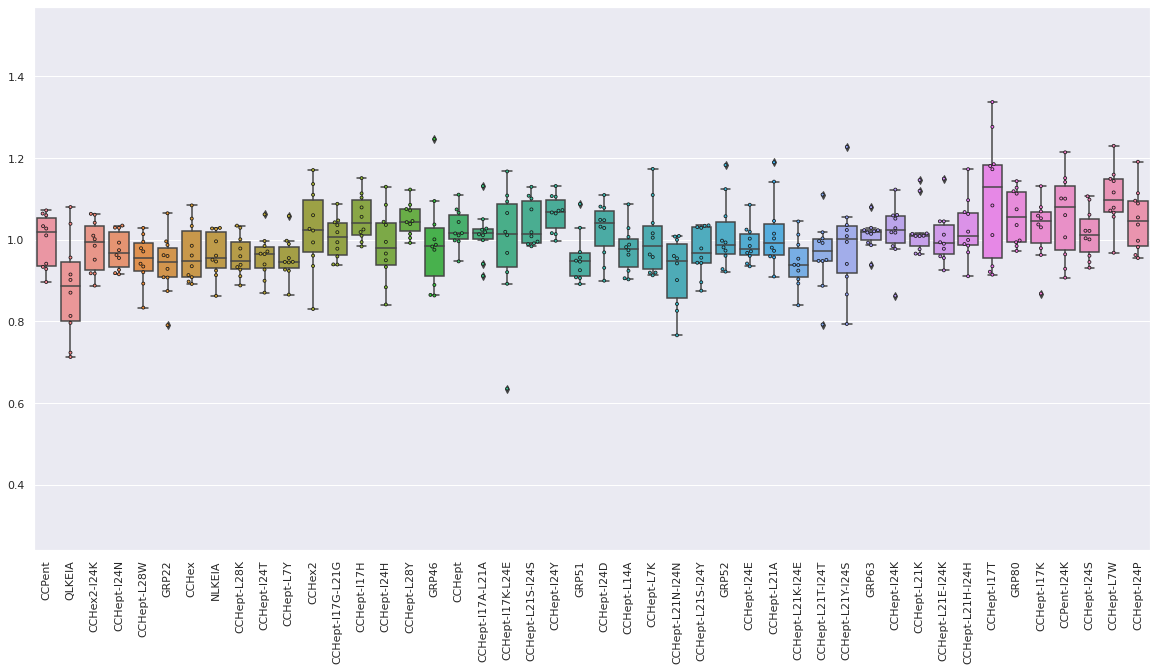

Maltose


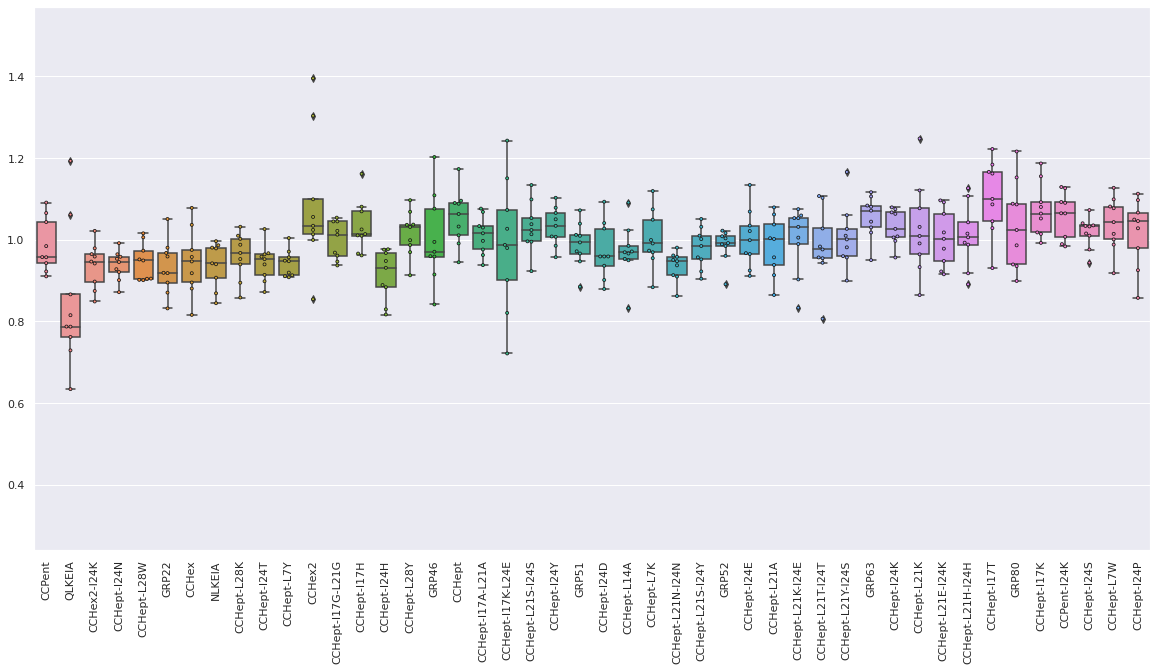

Glucosamine


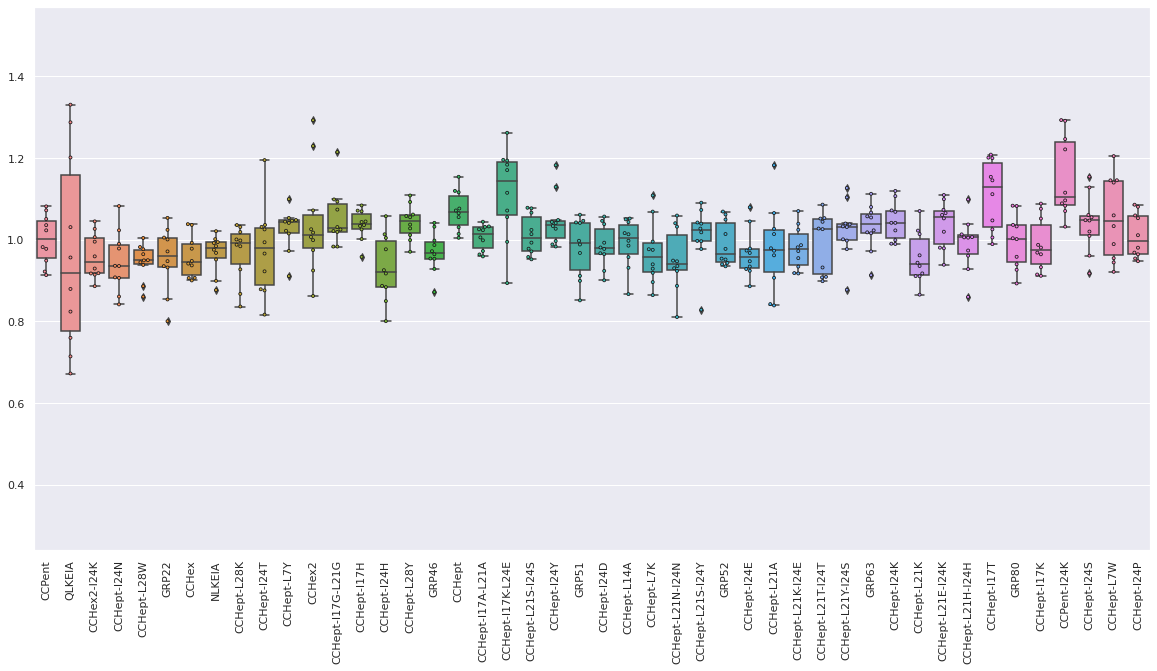

In [10]:
ymin = l_sugar_df.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_sugar_df.drop('Analyte', axis=1).max().max() + 0.1

fru_indices = [int(i) for i in range(l_sugar_df.shape[0]) if l_sugar_df['Analyte'][i] == 'fru']
glu_indices = [int(i) for i in range(l_sugar_df.shape[0]) if l_sugar_df['Analyte'][i] == 'glu']
man_indices = [int(i) for i in range(l_sugar_df.shape[0]) if l_sugar_df['Analyte'][i] == 'man']
mal_indices = [int(i) for i in range(l_sugar_df.shape[0]) if l_sugar_df['Analyte'][i] == 'mal']
gluam_indices = [int(i) for i in range(l_sugar_df.shape[0]) if l_sugar_df['Analyte'][i] == 'gluam']

sns.set(rc={'figure.figsize':(20,10)})
print('Fructose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_df.iloc[fru_indices])
sns.swarmplot(data=l_sugar_df.iloc[fru_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Fructose_barrel_readings_boxplot.svg'.format(l_sugar_fluor_data.results_dir))
plt.show()

print('Glucose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_df.iloc[glu_indices])
sns.swarmplot(data=l_sugar_df.iloc[glu_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Glucose_barrel_readings_boxplot.svg'.format(l_sugar_fluor_data.results_dir))
plt.show()

print('Mannose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_df.iloc[man_indices])
sns.swarmplot(data=l_sugar_df.iloc[man_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Mannose_barrel_readings_boxplot.svg'.format(l_sugar_fluor_data.results_dir))
plt.show()

print('Maltose')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_df.iloc[mal_indices])
sns.swarmplot(data=l_sugar_df.iloc[mal_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Maltose_barrel_readings_boxplot.svg'.format(l_sugar_fluor_data.results_dir))
plt.show()

print('Glucosamine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_sugar_df.iloc[gluam_indices])
sns.swarmplot(data=l_sugar_df.iloc[gluam_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Glucosamine_barrel_readings_boxplot.svg'.format(l_sugar_fluor_data.results_dir))
plt.show()

#### Run machine learning

In [11]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size
ml = RunML(
    results_dir='/home/ks17361/array_sensing_env/array_sensing/Paper_analysis/Sugars/Large_array_ML_results/',
    fluor_data=l_sugar_df
)

Directory /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/Sugars/Large_array_ML_results/ already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/Sugars/Large_array_ML_results/?y


In [12]:
ml.split_train_test_data(randomise=True, percent_test=0, test_analytes=[])

- Visualise correlation between the initial 46 features

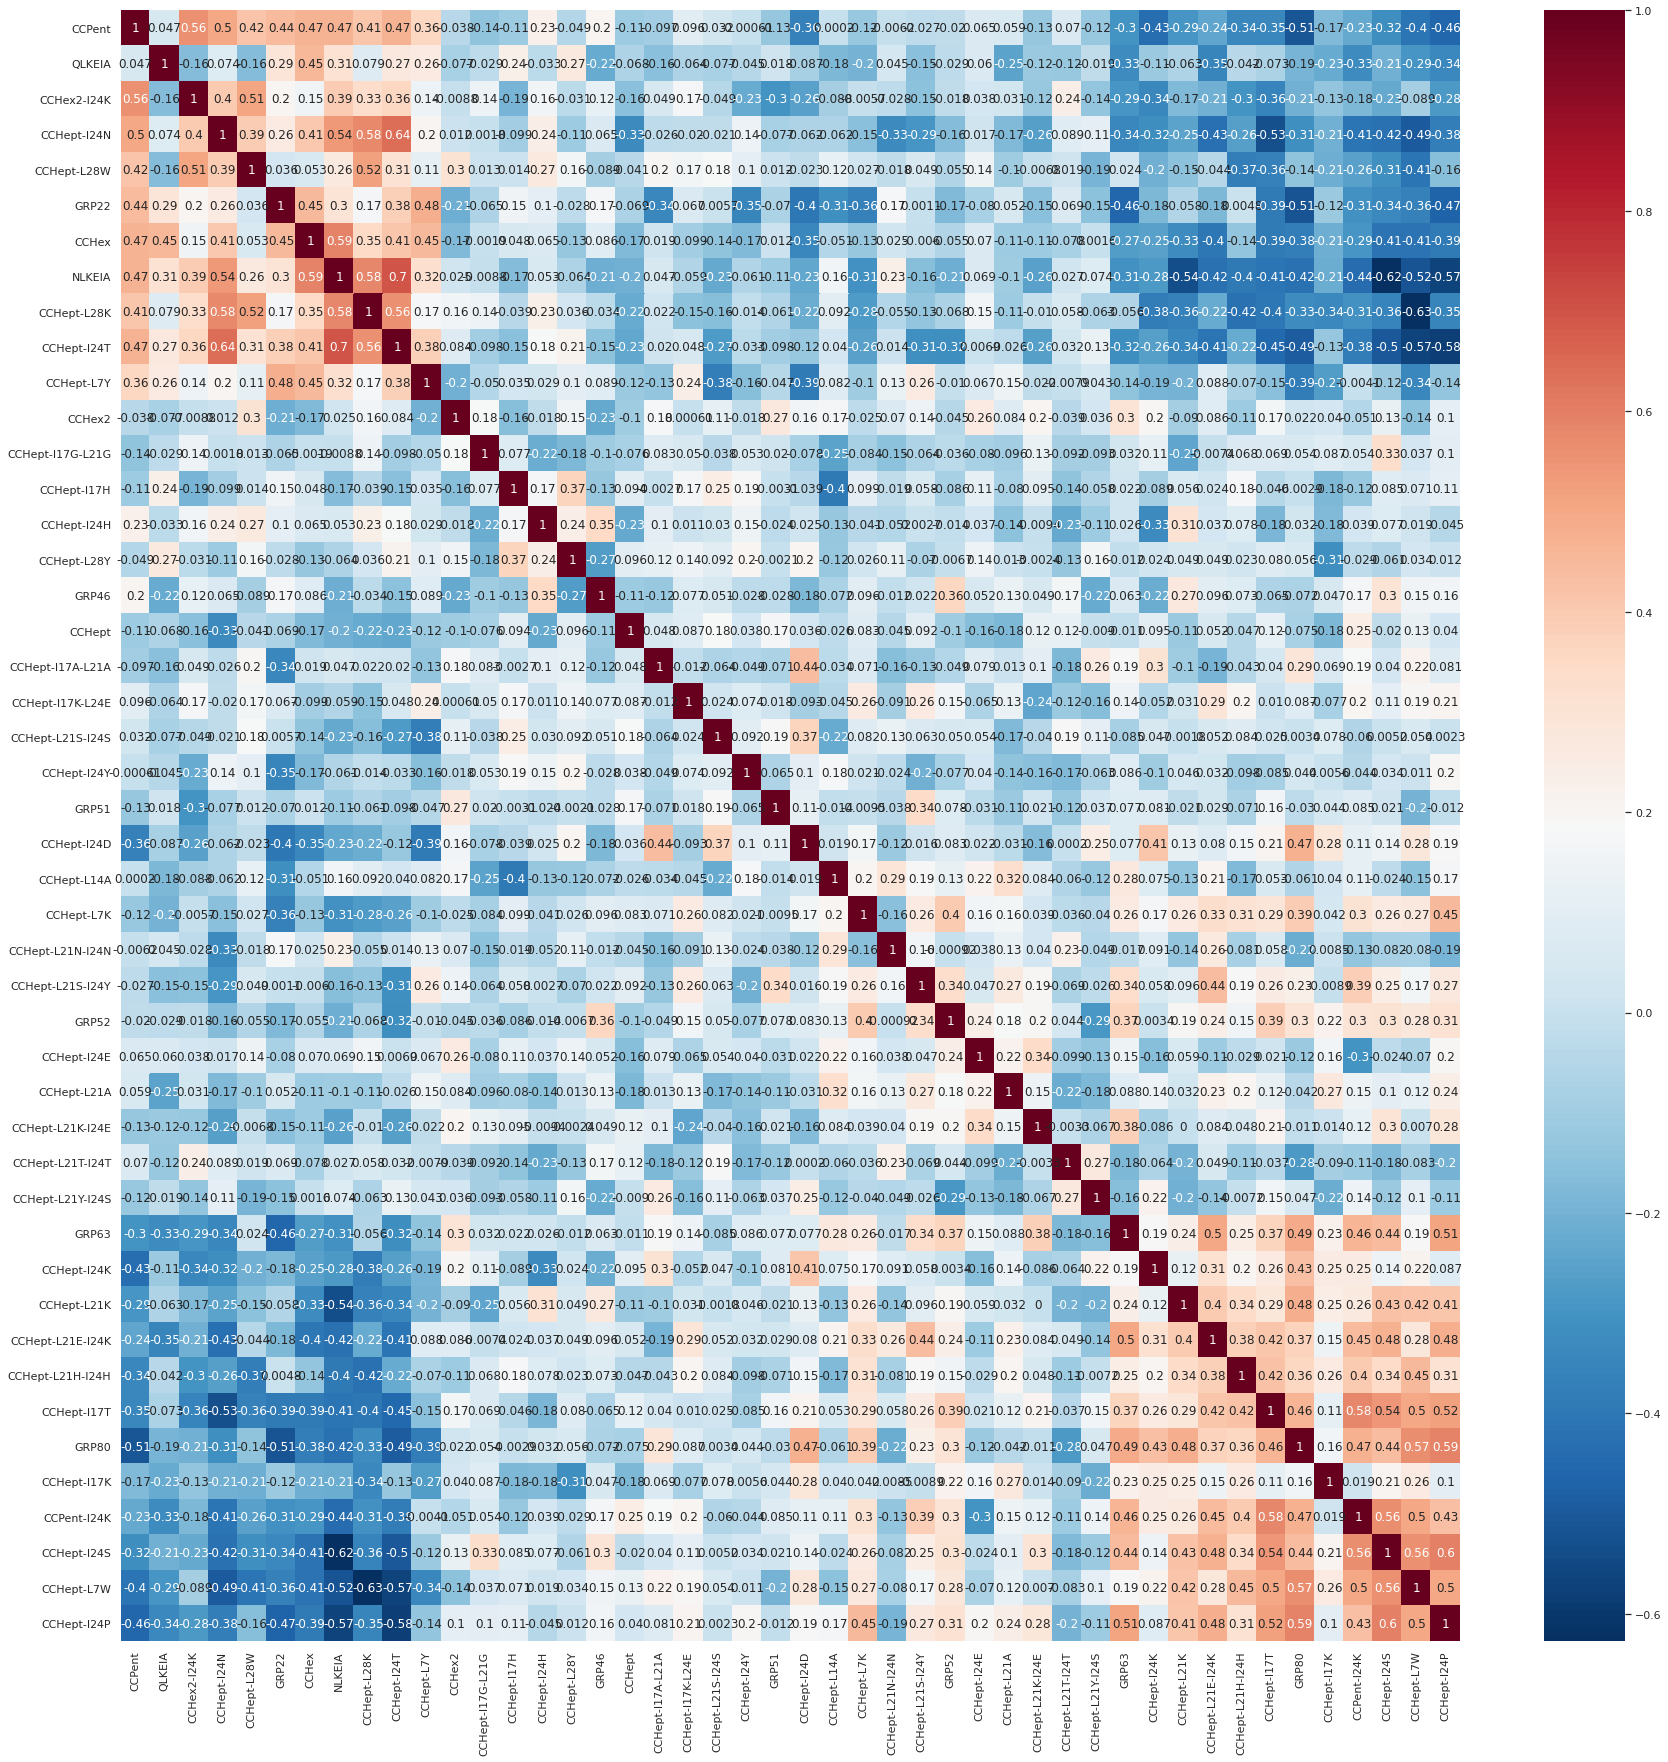

In [13]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features with ANOVA

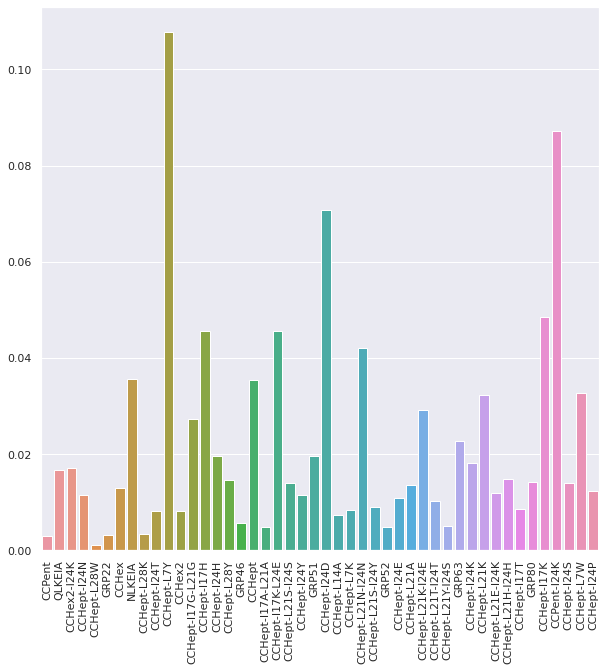

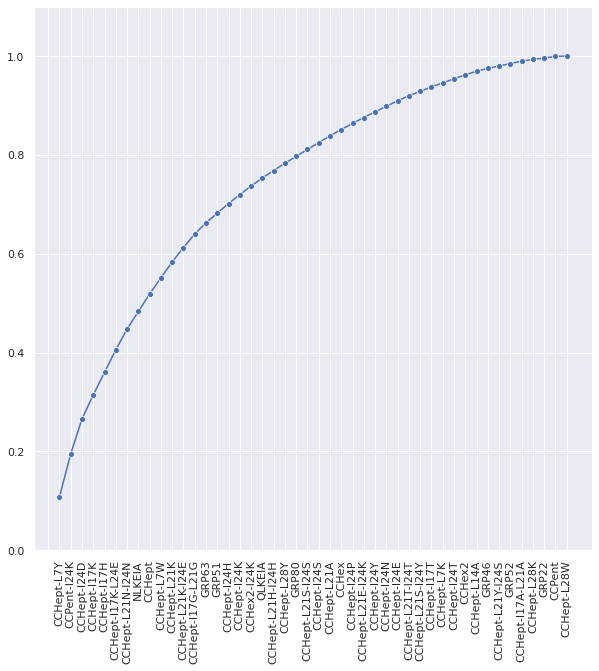

In [14]:
from sklearn.feature_selection import f_classif
f_classif_kbest_df = ml.calc_feature_importances_kbest(x=ml.x, y=ml.y, method_classif=f_classif)

In [15]:
print('Barrels ordered by ANOVA score:')
f_classif_top_barrels = f_classif_kbest_df.nlargest(n=46, columns='Score')
f_classif_top_barrels

Barrels ordered by ANOVA score:


Feature     Score
0         CCHept-L7Y  0.107668
1        CCPent-I24K  0.087190
2        CCHept-I24D  0.070795
3        CCHept-I17K  0.048541
4        CCHept-I17H  0.045644
5   CCHept-I17K-L24E  0.045573
6   CCHept-L21N-I24N  0.042019
7             NLKEIA  0.035582
8             CCHept  0.035322
9         CCHept-L7W  0.032735
10       CCHept-L21K  0.032236
11  CCHept-L21K-I24E  0.029115
12  CCHept-I17G-L21G  0.027356
13             GRP63  0.022639
14             GRP51  0.019509
15       CCHept-I24H  0.019495
16       CCHept-I24K  0.018106
17       CCHex2-I24K  0.017145
18            QLKEIA  0.016653
19  CCHept-L21H-I24H  0.014896
20       CCHept-L28Y  0.014546
21             GRP80  0.014186
22  CCHept-L21S-I24S  0.013921
23       CCHept-I24S  0.013885
24       CCHept-L21A  0.013573
25             CCHex  0.012909
26       CCHept-I24P  0.012299
27  CCHept-L21E-I24K  0.011981
28       CCHept-I24Y  0.011425
29       CCHept-I24N  0.011409
30       CCHept-I24E  0.010953
31  CCHept-L21T-I24T  0.010253
32  CCHept-L21S-I24Y  0.009004
33       CCHept-I17T  0.008661
34        CCHept-L7K  0.008390
35       CCHept-I24T  0.008205
36            CCHex2  0.008044
37       CCHept-L14A  0.007303
38             GRP46  0.005714
39  CCHept-L21Y-I24S  0.004931
40             GRP52  0.004859
41  CCHept-I17A-L21A  0.004840
42       CCHept-L28K  0.003434
43             GRP22  0.003074
44            CCPent  0.002969
45       CCHept-L28W  0.001013

- Measure the relative importances of the initial 46 features with decision trees

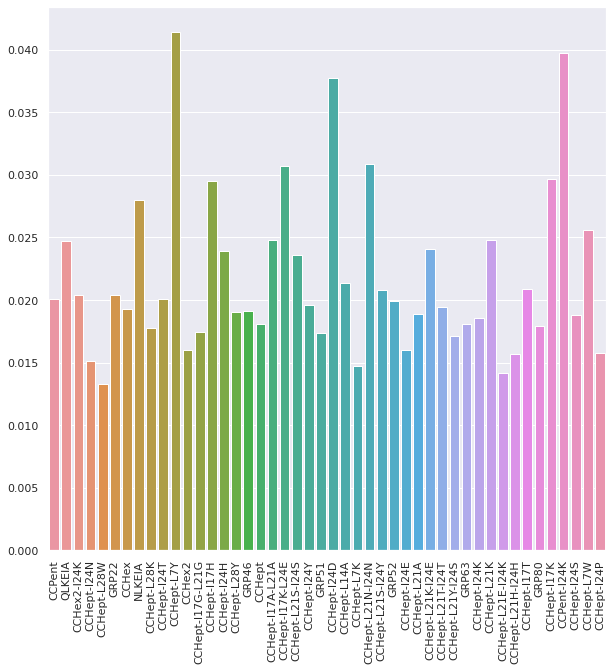

In [16]:
tree_feat_importances_df = ml.calc_feature_importances_tree(x=ml.x, y=ml.y)

In [17]:
print('Barrels ordered by tree score:')
tree_top_barrels = tree_feat_importances_df.nlargest(n=46, columns='Score')
tree_top_barrels

Barrels ordered by tree score:


Feature     Score
10        CCHept-L7Y  0.041382
42       CCPent-I24K  0.039772
23       CCHept-I24D  0.037724
26  CCHept-L21N-I24N  0.030855
19  CCHept-I17K-L24E  0.030699
41       CCHept-I17K  0.029652
13       CCHept-I17H  0.029536
7             NLKEIA  0.027982
44        CCHept-L7W  0.025554
18  CCHept-I17A-L21A  0.024821
36       CCHept-L21K  0.024816
1             QLKEIA  0.024719
31  CCHept-L21K-I24E  0.024048
14       CCHept-I24H  0.023875
20  CCHept-L21S-I24S  0.023559
24       CCHept-L14A  0.021317
39       CCHept-I17T  0.020856
27  CCHept-L21S-I24Y  0.020779
2        CCHex2-I24K  0.020402
5              GRP22  0.020372
0             CCPent  0.020113
9        CCHept-I24T  0.020111
28             GRP52  0.019945
21       CCHept-I24Y  0.019561
32  CCHept-L21T-I24T  0.019446
6              CCHex  0.019289
16             GRP46  0.019098
15       CCHept-L28Y  0.019074
30       CCHept-L21A  0.018881
43       CCHept-I24S  0.018779
35       CCHept-I24K  0.018532
34             GRP63  0.018118
17            CCHept  0.018052
40             GRP80  0.017945
8        CCHept-L28K  0.017721
12  CCHept-I17G-L21G  0.017474
22             GRP51  0.017383
33  CCHept-L21Y-I24S  0.017099
11            CCHex2  0.016002
29       CCHept-I24E  0.015977
45       CCHept-I24P  0.015777
38  CCHept-L21H-I24H  0.015644
3        CCHept-I24N  0.015085
25        CCHept-L7K  0.014719
37  CCHept-L21E-I24K  0.014171
4        CCHept-L28W  0.013283

- Run PCA to perform feature extraction and determine the number of features required to explain x% of the output signal

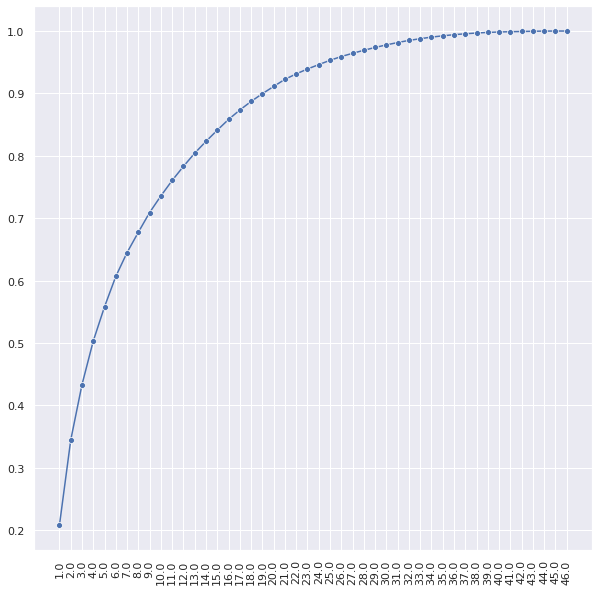

In [18]:
all_features_pca = ml.run_pca(x=ml.x)

~90% of the data can be explained by 19 features.

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [19]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [20]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1         -0.087548 -0.716839    -0.014096    -0.099791    -0.007822   
2         -0.170238  0.601441    -0.176519    -0.127439    -0.115484   
3         -0.148098 -0.023702    -0.131103    -0.088224    -0.073554   
4          0.021865  0.020412     0.030234     0.019561     0.112790   
5          0.047308  0.071311    -0.042160     0.103462     0.133759   
6         -0.148188 -0.008942    -0.015569     0.104699     0.004154   
7         -0.042399 -0.013857    -0.025999    -0.030556     0.007804   
8         -0.012635 -0.002470    -0.020762    -0.006044    -0.018675   
9         -0.046207  0.054469    -0.047803    -0.097250    -0.024709   
10        -0.169521 -0.081633    -0.288219    -0.173902    -0.034384   
11         0.094354 -0.077288     0.183306     0.152797    -0.081650   
12        -0.052367  0.014207    -0.058997     0.157542    -0.026395   
13        -0.056514  0.035968    -0.134895    -0.102098    -0.144870   
14         0.172213 -0.049727    -0.150987    -0.082658    -0.092357   
15         0.052877 -0.053241    -0.156180     0.188329     0.006606   
16         0.164022 -0.011139     0.273827     0.075720     0.154470   
17        -0.093567 -0.095622    -0.392668     0.212383    -0.065766   
18         0.066862 -0.005998     0.032620    -0.002126    -0.056244   
19        -0.111010 -0.084240     0.036345    -0.012753    -0.021075   
20         0.015489  0.118916     0.145748     0.071750    -0.038936   
21        -0.381328  0.011112    -0.048662     0.041618     0.028956   
22        -0.225571 -0.038584     0.203471    -0.303527     0.017443   
23        -0.088391  0.105180     0.059668     0.034338     0.048297   
24         0.350509  0.044941     0.048863     0.000115     0.107011   
25         0.176986  0.025085    -0.263620    -0.251733    -0.104561   
26         0.142487  0.005028    -0.109879    -0.080420     0.084559   
27        -0.118059 -0.046054     0.141517    -0.108899     0.044369   
28         0.170447 -0.001978    -0.094738     0.146703    -0.109721   
29         0.109543 -0.134159    -0.174892     0.138714    -0.044914   
30         0.067196 -0.039300    -0.119840    -0.038310    -0.065534   
31         0.064718  0.034498    -0.128378    -0.055657    -0.089318   
32        -0.052197 -0.027721     0.026411    -0.132921    -0.366872   
33        -0.034480  0.059608     0.198681     0.144749    -0.345748   
34         0.185914 -0.015456     0.050007    -0.187587    -0.221637   
35        -0.041331 -0.061252     0.068096     0.364704    -0.287234   
36        -0.210000 -0.028723    -0.108350     0.022117     0.247484   
37        -0.147449  0.063319    -0.062871     0.224126    -0.043841   
38        -0.021010 -0.031196    -0.017501    -0.249251    -0.029385   
39         0.148463  0.024649     0.066866    -0.177171    -0.215022   
40        -0.054360 -0.043480    -0.083793     0.170443    -0.129085   
41         0.120674  0.051409    -0.211529     0.070723     0.174809   
42         0.061168 -0.005995     0.195442    -0.125249    -0.202281   
43         0.333385  0.052847     0.081790     0.076888    -0.011811   
44         0.248912 -0.007473    -0.227546    -0.113134     0.314272   
45        -0.135503  0.048047     0.261015    -0.090762     0.352991   
46        -0.020391  0.049596     0.027168     0.310554     0.095601   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.122591 -0.156952 -0.129484    -0.083192    -0.163446  ...   
2         -0.051457 -0.043558 -0.090188    -0.126918    -0.101917  ...   
3         -0.114179 -0.063131 -0.020465    -0.019127    -0.094781  ...   
4         -0.087469 -0.056686  0.056005     0.072732     0.096835  ...   
5         -0.049613  0.016754  0.024867     0.141651     0.071030  ...   
6         -0.169377 -0.139147 -0.08542

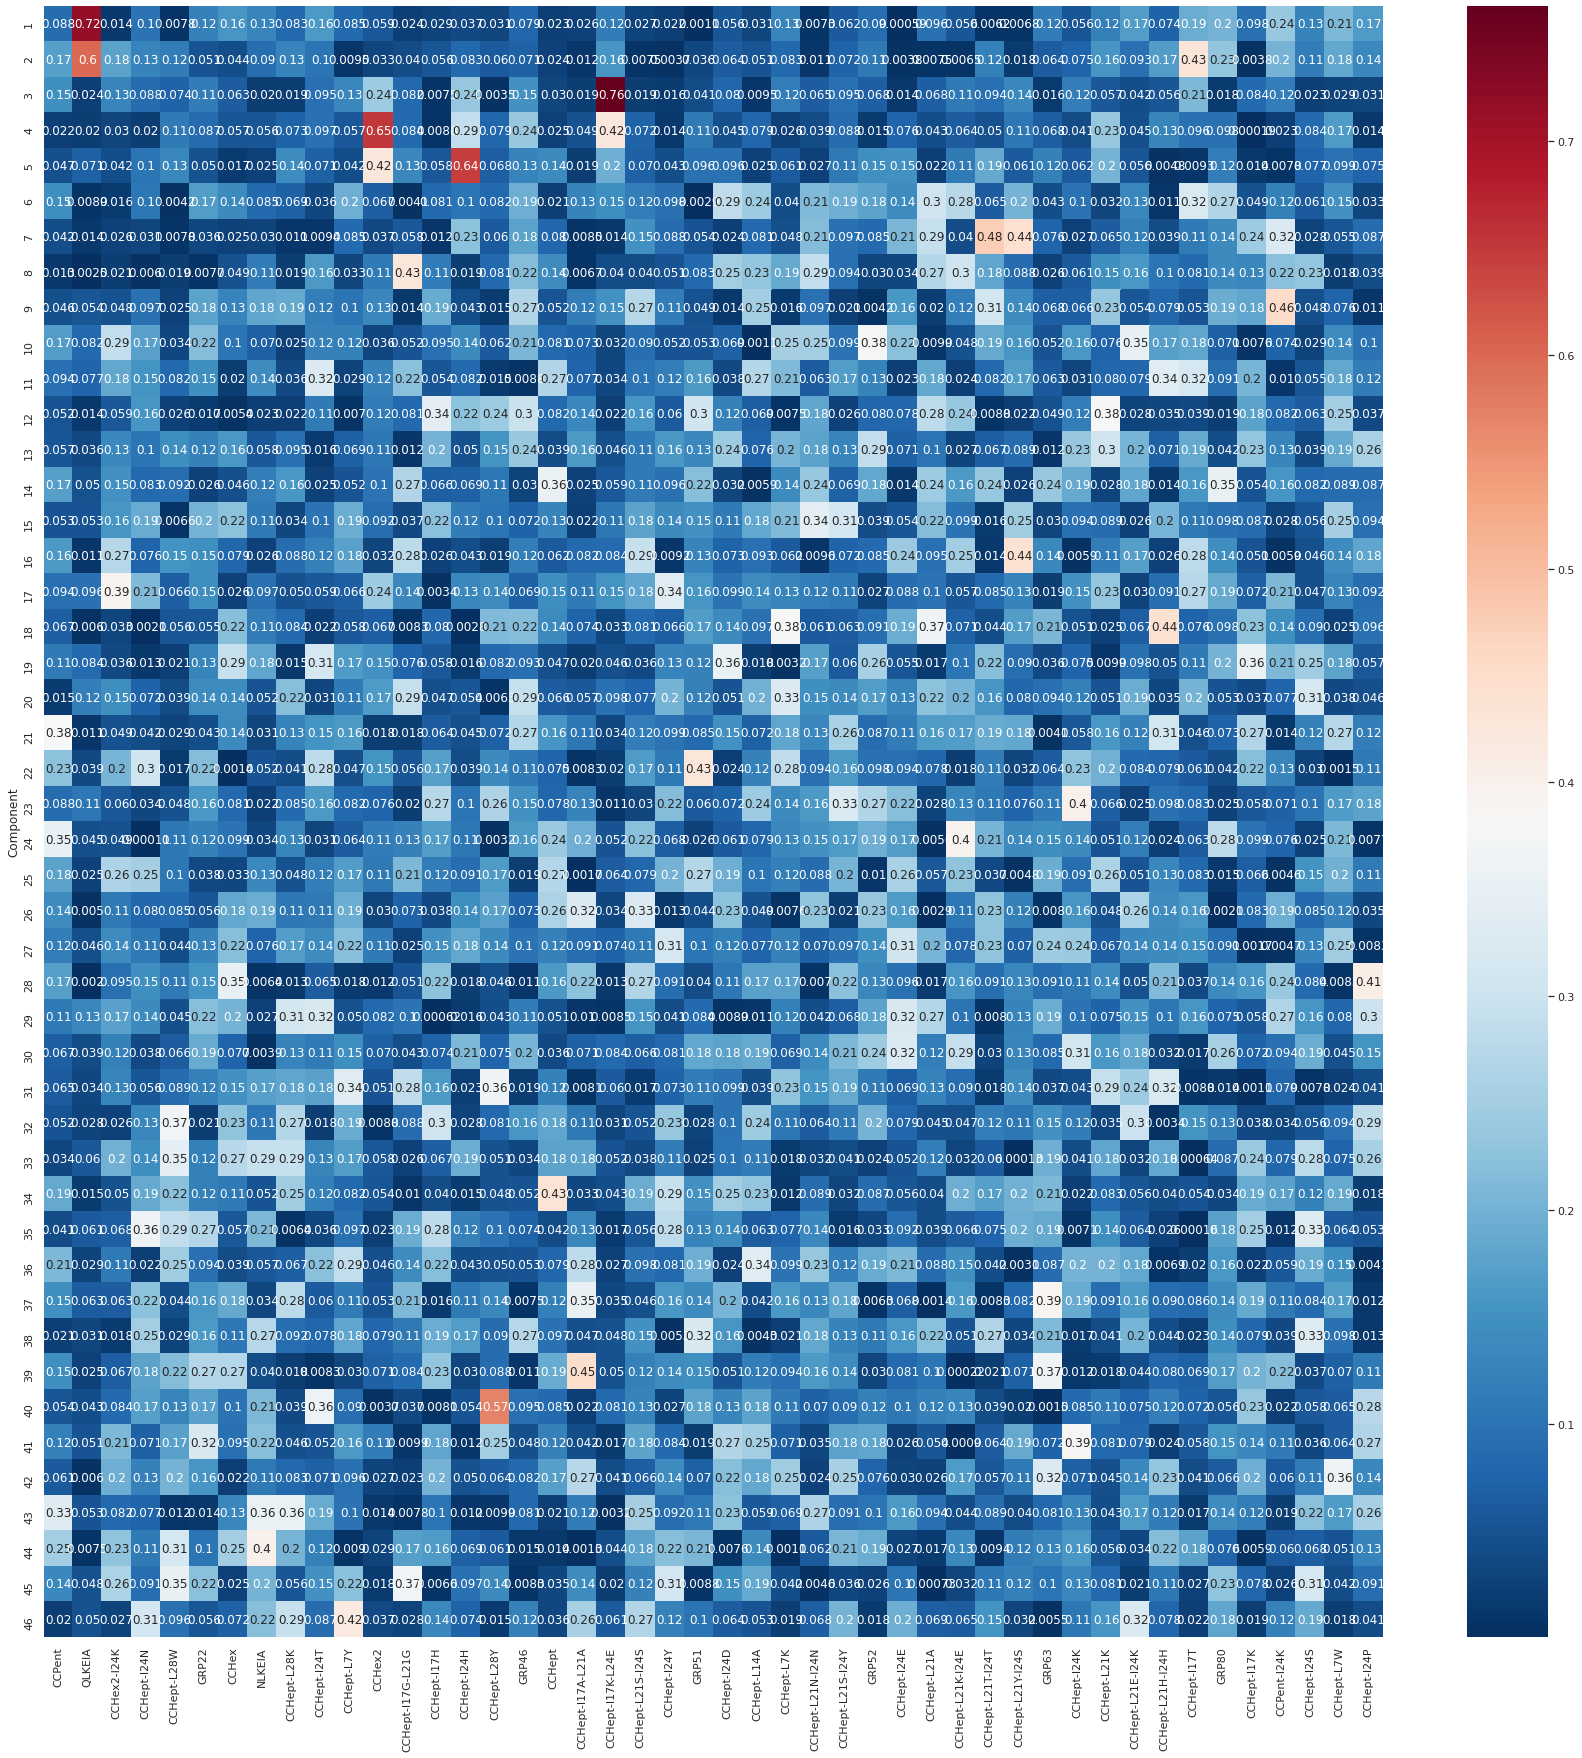

In [21]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [22]:
top_pca_components = []
for row in range(pca_components.shape[0]):
    indices = np.argsort(pca_components.abs().iloc[row])
    barrel_1 = ml.features[indices[-1]]
    barrel_2 = ml.features[indices[-2]]
    for barrel in [barrel_1, barrel_2]:
        if not barrel in top_pca_components:
            top_pca_components.append(barrel)

print('Top two barrels per PCA component:')
for barrel in top_pca_components:
    print(barrel)
print(len(top_pca_components))

Top two barrels per PCA component:
QLKEIA
CCPent-I24K
CCHept-I17T
CCHept-I17K-L24E
CCHex2
CCHept-I24H
CCHept-L21A
CCHept-L21T-I24T
CCHept-L21Y-I24S
CCHept-I17G-L21G
CCHept-L21K-I24E
GRP52
CCHept-L21E-I24K
CCHept-L21H-I24H
CCHept-I24T
CCHept-L21K
CCHept-I17H
CCHept
GRP80
CCHept-L21N-I24N
CCHept-L21S-I24Y
CCHept-L21S-I24S
CCHex2-I24K
CCHept-I24Y
CCHept-L7K
CCHept-I24D
CCHept-I17K
CCHept-I24S
CCPent
GRP51
CCHept-I24N
CCHept-I24K
CCHept-I17A-L21A
CCHept-I24E
CCHept-I24P
CCHex
CCHept-L28Y
CCHept-L7Y
CCHept-L28W
NLKEIA
CCHept-L14A
GRP63
GRP22
CCHept-L7W
CCHept-L28K
45


Relative contribution of each barrel to the different PCA components

In [23]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components).abs().div(col_sums, axis=1)

In [24]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.015965  0.224144     0.002592     0.017917     0.001563   
2          0.031044  0.188061     0.032457     0.022882     0.023077   
3          0.027007  0.007411     0.024106     0.015841     0.014698   
4          0.003987  0.006383     0.005559     0.003512     0.022539   
5          0.008627  0.022298     0.007752     0.018577     0.026729   
6          0.027023  0.002796     0.002863     0.018799     0.000830   
7          0.007732  0.004333     0.004780     0.005486     0.001559   
8          0.002304  0.000772     0.003817     0.001085     0.003732   
9          0.008426  0.017031     0.008790     0.017461     0.004938   
10         0.030913  0.025525     0.052995     0.031224     0.006871   
11         0.017206  0.024167     0.033704     0.027435     0.016316   
12         0.009549  0.004442     0.010848     0.028287     0.005275   
13         0.010306  0.011247     0.024803     0.018332     0.028949   
14         0.031404  0.015549     0.027762     0.014841     0.018456   
15         0.009642  0.016648     0.028717     0.033814     0.001320   
16         0.029911  0.003483     0.050349     0.013596     0.030868   
17         0.017063  0.029899     0.072200     0.038133     0.013142   
18         0.012193  0.001876     0.005998     0.000382     0.011239   
19         0.020243  0.026341     0.006683     0.002290     0.004211   
20         0.002824  0.037183     0.026799     0.012883     0.007781   
21         0.069538  0.003475     0.008947     0.007472     0.005786   
22         0.041134  0.012065     0.037412     0.054498     0.003486   
23         0.016119  0.032888     0.010971     0.006165     0.009651   
24         0.063918  0.014053     0.008984     0.000021     0.021384   
25         0.032275  0.007844     0.048472     0.045199     0.020894   
26         0.025983  0.001572     0.020204     0.014439     0.016897   
27         0.021529  0.014400     0.026021     0.019553     0.008866   
28         0.031082  0.000619     0.017419     0.026340     0.021926   
29         0.019976  0.041949     0.032157     0.024906     0.008975   
30         0.012254  0.012289     0.022035     0.006879     0.013096   
31         0.011802  0.010787     0.023605     0.009993     0.017848   
32         0.009518  0.008668     0.004856     0.023866     0.073312   
33         0.006288  0.018638     0.036531     0.025990     0.069091   
34         0.033903  0.004833     0.009195     0.033681     0.044290   
35         0.007537  0.019153     0.012521     0.065482     0.057398   
36         0.038295  0.008981     0.019922     0.003971     0.049455   
37         0.026888  0.019799     0.011560     0.040242     0.008761   
38         0.003831  0.009754     0.003218     0.044753     0.005872   
39         0.027073  0.007707     0.012295     0.031811     0.042968   
40         0.009913  0.013595     0.015407     0.030603     0.025795   
41         0.022006  0.016075     0.038894     0.012698     0.034932   
42         0.011154  0.001874     0.035936     0.022488     0.040422   
43         0.060795  0.016524     0.015039     0.013805     0.002360   
44         0.045391  0.002337     0.041839     0.020313     0.062801   
45         0.024710  0.015024     0.047993     0.016296     0.070538   
46         0.003719  0.015508     0.004995     0.055760     0.019104   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.020840  0.028558  0.024627     0.015874     0.029834  ...   
2          0.008747  0.007926  0.017153     0.024218     0.018603  ...   
3          0.019410  0.011487  0.003892     0.003650     0.017300  ...   
4          0.014869  0.010314  0.010652     0.013878     0.017675  ...   
5          0.008434  0.003049  0.004729     0.027029     0.012965  ...   
6          0.028793  0.025319  0.01624

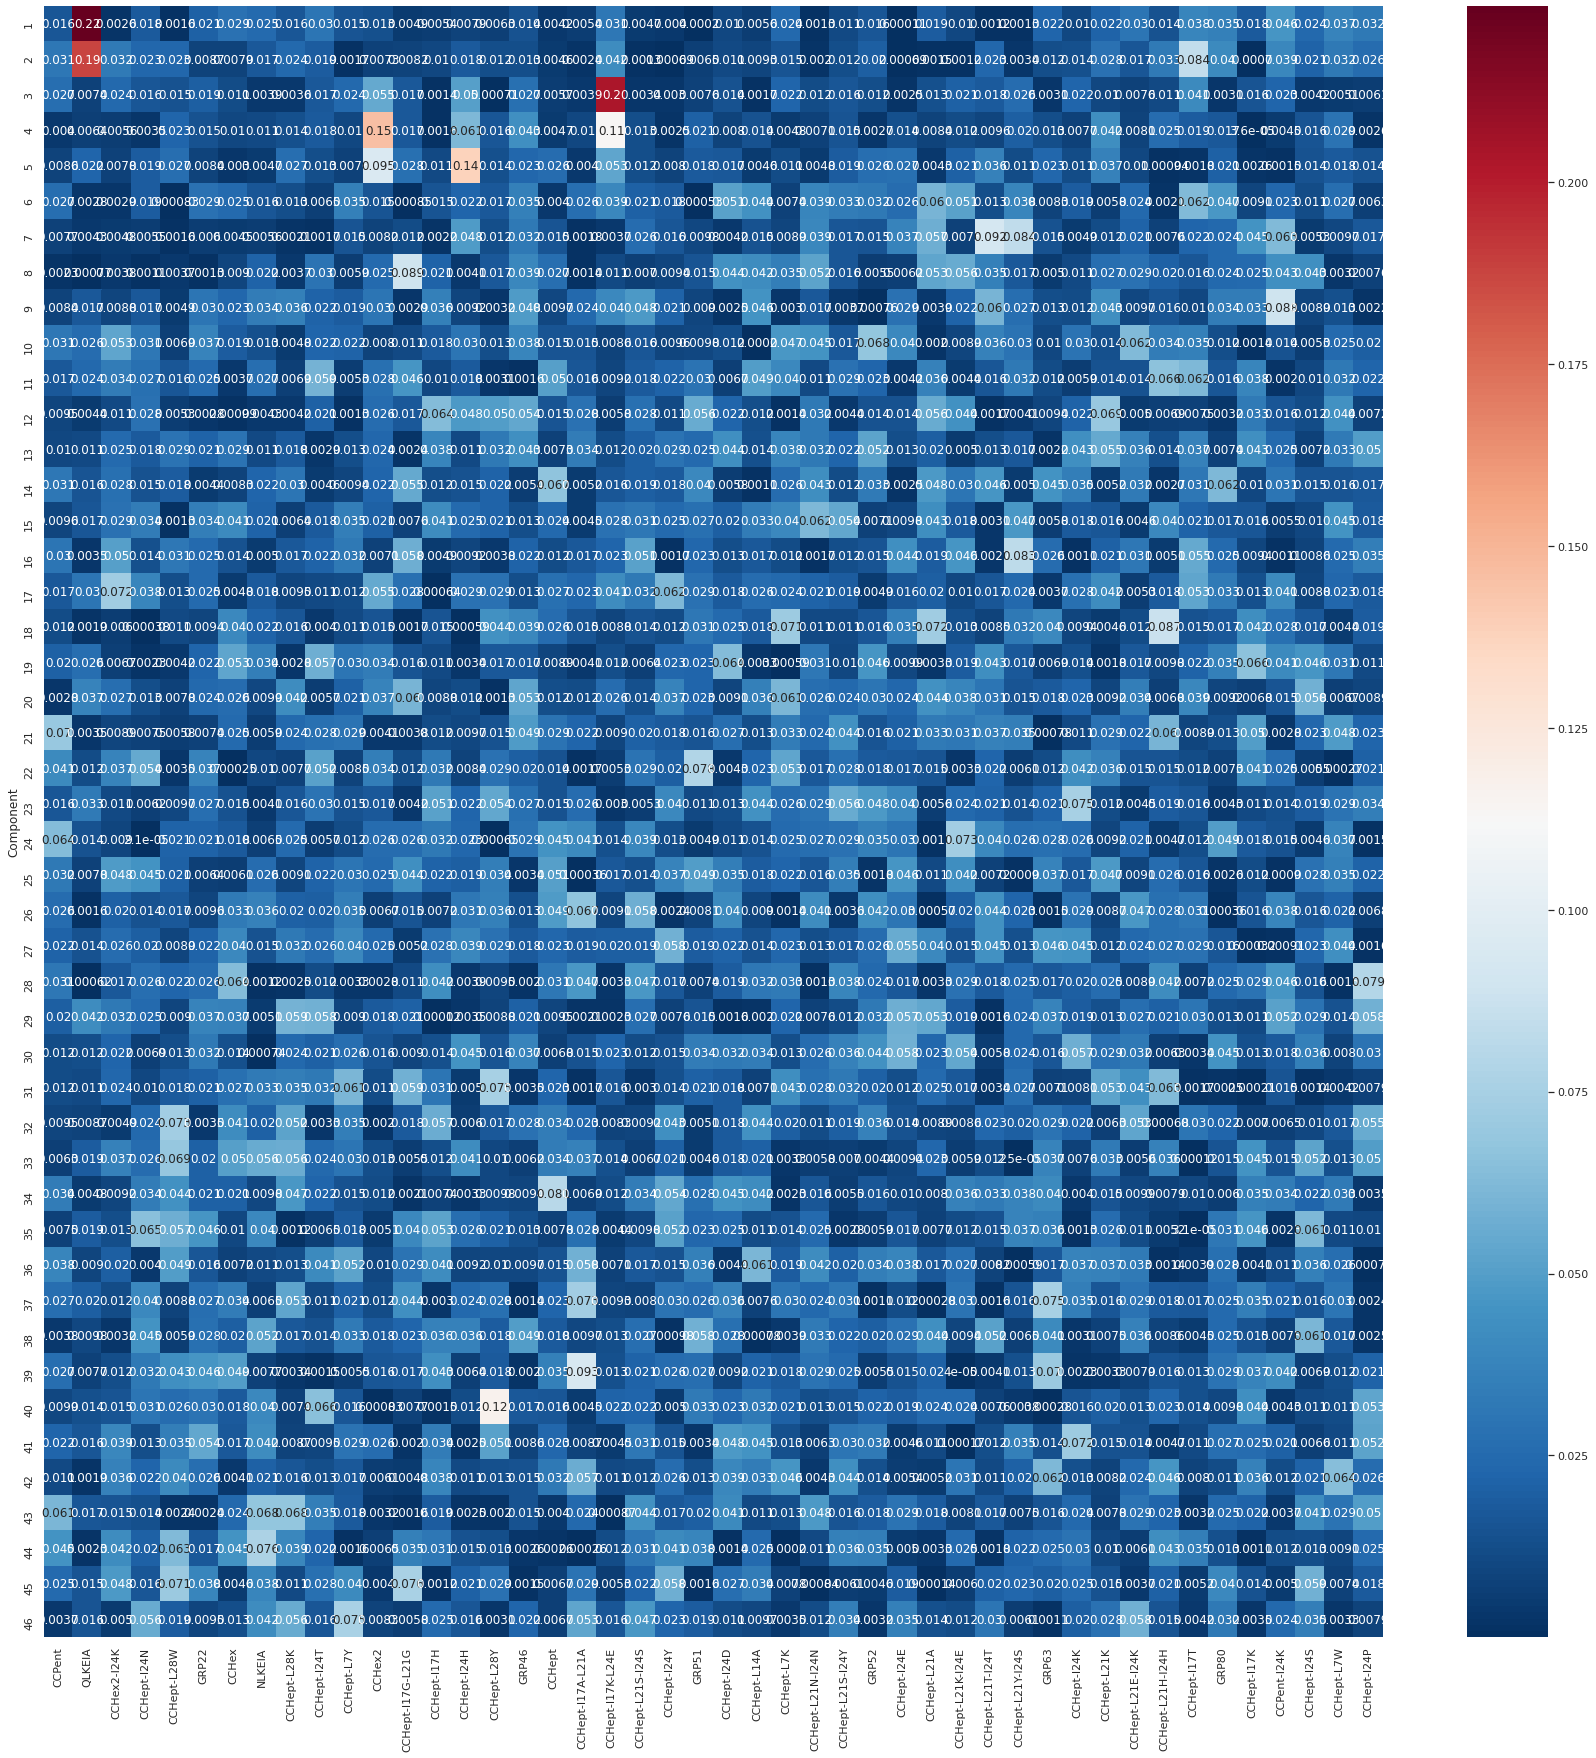

In [25]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components, cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_relative_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [26]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    # random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

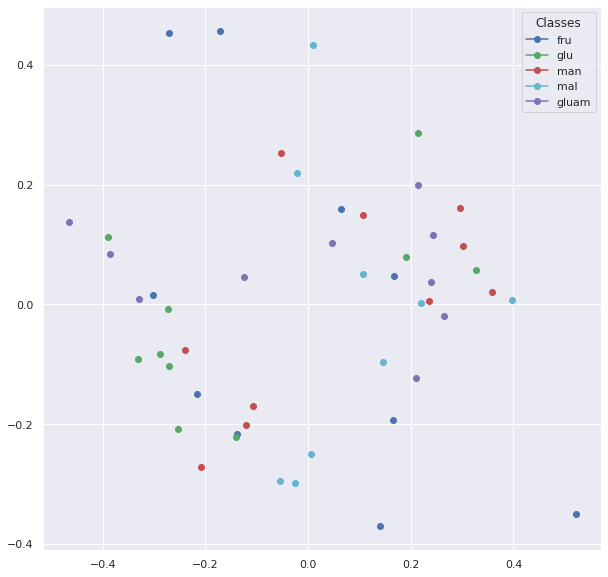

In [27]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 2D scatter plot
plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['fru', 'glu', 'man', 'mal', 'gluam'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

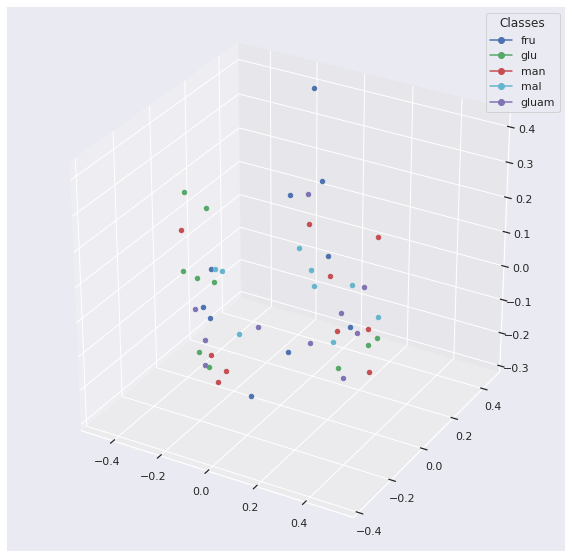

In [28]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
pca_fitted = pca_3d.fit(X=ml.x)
X_reduced_3d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
plot_scatter(
    x_data=X_reduced_3d, y_data=ml.y, dimensions=3, categories=['fru', 'glu', 'man', 'mal', 'gluam'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

##### Train models with different numbers of features and/or PCA components

- All features

Runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [29]:
n_components_pca = None  # Specifies not to run PCA
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
all_feat_random_cv_searches = {}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]
for algorithm in algorithms:
    for resampling_method in resampling_methods:
        fixed_params = ml.define_fixed_model_params(clf=algorithm())
        tuned_params = ml.define_tuned_model_params(clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop)
        nested_cv_search = ml.run_nested_CV(
            clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups, selected_features=ml.features,
            n_components_pca=n_components_pca, run='randomsearch', fixed_params=fixed_params,
            tuned_params=tuned_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
            resampling_method=resampling_method, n_iter=n_iter, cv_folds_inner_loop=cv_folds_inner_loop,
            cv_folds_outer_loop=cv_folds_outer_loop, draw_conf_mat=False
        )

        score_dict['Algorithm'].append(algorithm.__name__)
        score_dict['Resampling_method'].append(resampling_method)
        score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
        score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
        all_feat_random_cv_searches['{}__{}'.format(algorithm.__name__, resampling_method)] = nested_cv_search

        for index, model in enumerate(nested_cv_search['outer_loop_models']):
            print('\n\n\n\n\n')
            print('{}: {}'.format(algorithm.__name__, resampling_method))
            print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
            print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

all_feat_random_search_score_df = pd.DataFrame(score_dict)

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.3






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.2






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.5






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 0.3






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.0






KNeighborsClassifier: no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 2, 'n_neighbors': 6}
Accuracy: 0.5






KNeighborsClassifier: n

In [30]:
all_feat_random_search_score_df

Algorithm Resampling_method  Average_accuracy  Std_dev_accuracy
0    LogisticRegression      no_balancing          0.260000          0.162481
1  KNeighborsClassifier      no_balancing          0.304444          0.123248
2            GaussianNB      no_balancing          0.242222          0.133407
3             LinearSVC      no_balancing          0.306667          0.110353
4                   SVC      no_balancing          0.326667          0.038873

The algorithms perform similarly - will select SVC since has best average performance (also has consistent performance on the 5 test splits)

In [31]:
all_feat_random_cv_searches['SVC__no_balancing']['outer_loop_params']

[{'gamma': 0.0013810679320049757, 'C': 11.313708498984761},
 {'gamma': 8.631674575031098e-05, 'C': 256.0},
 {'gamma': 0.00390625, 'C': 4.0},
 {'gamma': 0.03125, 'C': 5.656854249492381},
 {'gamma': 0.02209708691207961, 'C': 11585.237502960395}]

In [32]:
all_feat_random_cv_searches['SVC__no_balancing']['best_outer_loop_params']

{'gamma': 0.03125, 'C': 5.656854249492381}

In [33]:
all_feat_random_cv_searches['SVC__no_balancing']['test_scores']['accuracy']

[0.3, 0.3, 0.3, 0.4, 0.3333333333333333]

In [34]:
all_feat_pred = all_feat_random_cv_searches['SVC__no_balancing']['predictions']
all_feat_y_true = all_feat_random_cv_searches['SVC__no_balancing']['y_true']
all_feat_x_true = all_feat_random_cv_searches['SVC__no_balancing']['x_true']

all_feat_flat_pred = [pred for pred_array in all_feat_pred for pred in pred_array]
all_feat_flat_y_true = [y for y_array in all_feat_y_true for y in y_array]
all_feat_flat_x_true = np.array([x for x_array in all_feat_x_true for x in x_array])

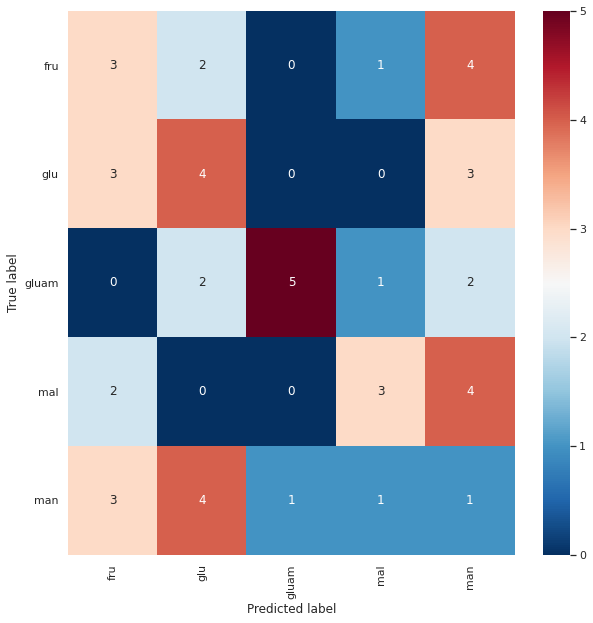

Normalised over true label (rows)


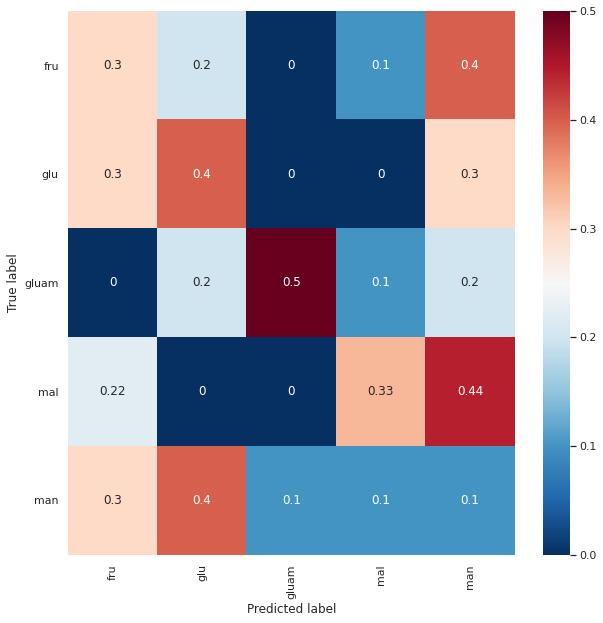

Normalised over pred label (columns)


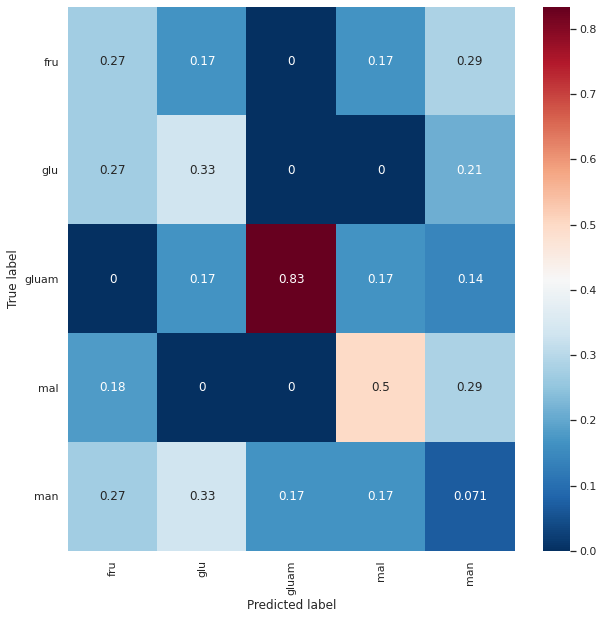

In [35]:
normalisation_methods = OrderedDict({None: '',
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(all_feat_flat_y_true, all_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=all_feat_flat_y_true, y_pred=all_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.savefig('{}/All_feat_confusion_matrix.svg'.format(ml.results_dir))
    plt.show()

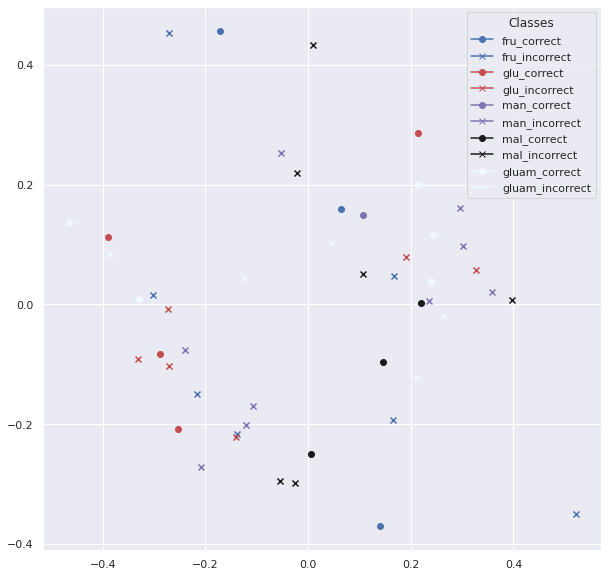

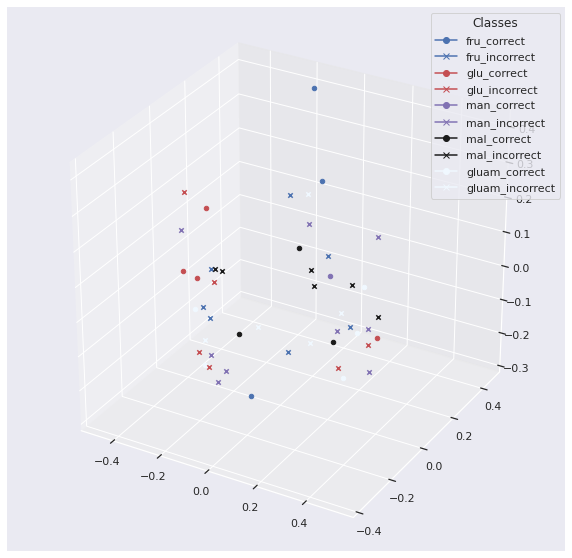

In [36]:
all_feat_X_test_reduced = pca_fitted.transform(X=all_feat_flat_x_true)
all_feat_pred_hue = []
for index, y in enumerate(all_feat_flat_y_true):
    if all_feat_flat_pred[index] == y:
        all_feat_pred_hue.append('{}_correct'.format(y))
    else:
        all_feat_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=2,
    categories=['fru_correct', 'fru_incorrect', 'glu_correct', 'glu_incorrect', 'man_correct', 'man_incorrect',
                'mal_correct', 'mal_incorrect', 'gluam_correct', 'gluam_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=3,
    categories=['fru_correct', 'fru_incorrect', 'glu_correct', 'glu_incorrect', 'man_correct', 'man_incorrect',
                'mal_correct', 'mal_incorrect', 'gluam_correct', 'gluam_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# fru_incorrect = Value that is actually fructose is predicted to be something else

- Feature reduction / extraction

Compares 3 different methods of feature reduction / extraction with 8 different numbers of features. For each method, runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- feature selection
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [38]:
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

num_features = [1, 2, 3, 5, 10, 15, 20, 30]
red_methods = ['anova', 'tree', 'top_pca_components']  # 'pca' - can't use to reduce number of barrels
red_data = {'pca': {'selected_features': ml.features},
            'anova': {'selected_features': f_classif_top_barrels['Feature'].tolist()},
            'tree': {'selected_features': tree_top_barrels['Feature'].tolist()},
            'top_pca_components': {'selected_features': top_pca_components}}
resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]

score_dict = OrderedDict({'Number_of_features': [],
                          'Feature_reduction_method': [],
                          'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

red_feat_random_cv_searches = {}
for num in num_features:
    for red_method in red_methods:
        for algorithm in algorithms:
            for resampling_method in resampling_methods:
                fixed_params = ml.define_fixed_model_params(clf=algorithm())
                tuned_params = ml.define_tuned_model_params(
                    clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop
                )
                if red_method == 'pca':
                    selected_features = red_data['pca']['selected_features']
                    n_components_pca = num
                else:
                    selected_features = red_data['pca']['selected_features'][:num]
                    n_components_pca = None

                nested_cv_search = ml.run_nested_CV(
                    clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups,
                    selected_features=selected_features, n_components_pca=n_components_pca, run='randomsearch',
                    fixed_params=fixed_params, tuned_params=tuned_params, train_scoring_func='accuracy',
                    test_scoring_funcs=scoring_funcs, resampling_method=resampling_method, n_iter=n_iter,
                    cv_folds_inner_loop=cv_folds_inner_loop, cv_folds_outer_loop=cv_folds_outer_loop,
                    draw_conf_mat=False
                )

                score_dict['Number_of_features'].append(num)
                score_dict['Feature_reduction_method'].append(red_method)
                score_dict['Algorithm'].append(algorithm.__name__)
                score_dict['Resampling_method'].append(resampling_method)
                score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
                score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
                red_feat_random_cv_searches[
                    '{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method)
                ] = nested_cv_search

                for index, model in enumerate(nested_cv_search['outer_loop_models']):
                    print('\n\n\n\n\n')
                    print('{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method))
                    print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
                    print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

red_feat_random_search_score_df = pd.DataFrame(score_dict)

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.2






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






1__anova__LogisticRegression__no_balancing
Para

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001
Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.0






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.0031622776601683794}
Accuracy: 0.2






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.2






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.001}
Accuracy: 0.2






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2222222222222222






1__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbo

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.2






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', '

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.0031622776601683794}
Accuracy: 0.2






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.1






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.0






2__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'dist

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.01}
Accuracy: 0.2






2__tree__LogisticReg

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.0






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class'

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.0






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.2






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.3333333333333333






3__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbors': 2}


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 0.0






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.0






3__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 2, 'n_neighbors': 2}
Accuracy: 

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.2






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.03162277660168379}
Accuracy: 0.2






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.0






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.3333333333333333






3__top_pca_components__KNeighborsClassifier__no_balan

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.1






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 0.2






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.01}
Accuracy: 0.2






5__anova__Logistic

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.2






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






5__tree__LogisticReg

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.2






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.2






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.1






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.1111111111111111






5__top_pca_components__KNeighborsClassifier__no_balancing
Parameters: {'metr

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.1






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.001}
Accuracy: 0.2






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.03162277660168379}
Accuracy: 0.2






10__anova__

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff







10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.0






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.0031622776601683794}
Accuracy: 0.2






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2222222222222222






10__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weigh

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.001}
Accuracy: 0.2






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.0






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'mul

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.5






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.0






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.1






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.4






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.3333333333333333






15__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbors': 2}
Accur

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 do







15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 0.3






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.2






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.4






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.2






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.4444444444444444






15__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'we

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.0






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.3






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.1






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 0.4






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.4444444444444444






15__top_pca_components__KNeighborsClassifier_

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.4






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.3






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.1






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.6






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.2222222222222222






20__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 2, 'n_

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.2






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.0






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.4






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.4






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.3333333333333333






20__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 1, 'n_neighbors

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.2






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.1






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.2






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.1






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.3333333333333333






20__top_pca_components__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jo

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.4






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.1






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.4






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.1






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.3333333333333333






30__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 1, 'n_neighbors': 8}
Accura

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.5






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 0.0






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.3






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.5






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.1111111111111111






30__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 2, 'n_neighbors':

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.4






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.3






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.1






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.3






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.1111111111111111






30__top_pca_components__KNeighborsClassifier__no_balancing
Parameters: {'metric': '

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 4.52548340e+01 6.40000000e+01 9.05096680e+01
 1.28000000e+02 1.81019336e+02 2.56000000e+02 3.62038672e+02
 5.12000000e+02 7.24077344e+02 1.02400000e+03 1.44815469e+03
 2.04800000e+03 2.89630938e+03 4.09600000e+03 5.79261875e+03
 8.19200000e+03 1.15852375e+04 1.63840000e+04 2.31704750e+04
 3.27680000e+04]
Value selected: 0.03125






30__top_pca_components__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 0.04419417382415922}
Accuracy: 0.4






30__top_pca_components__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 256.0}
Accuracy: 0.6






30__top_pca_components__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 0.0883883476483184

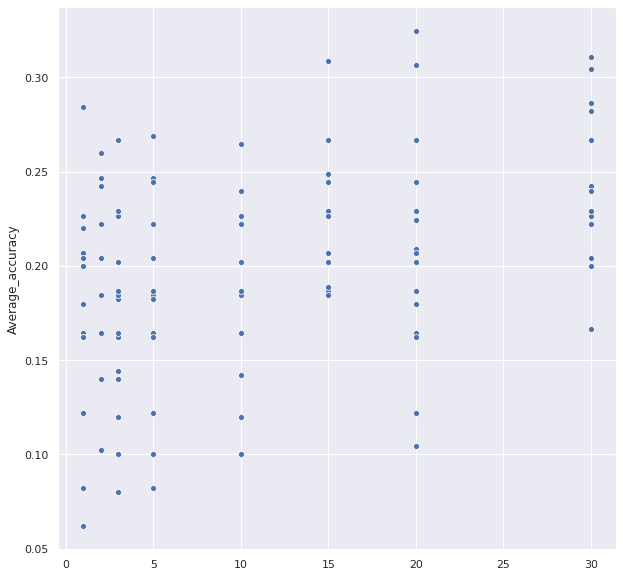

In [39]:
plt.clf()
sns.scatterplot(x=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                   5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                   10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                   15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                   20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                   30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
                y=red_feat_random_search_score_df['Average_accuracy'])
plt.show()

So, can achieve similar level of performance with 15 barrels

In [40]:
red_feat_random_search_score_df[red_feat_random_search_score_df['Number_of_features'] == 15]

Number_of_features Feature_reduction_method             Algorithm  \
75                  15                    anova    LogisticRegression   
76                  15                    anova  KNeighborsClassifier   
77                  15                    anova            GaussianNB   
78                  15                    anova             LinearSVC   
79                  15                    anova                   SVC   
80                  15                     tree    LogisticRegression   
81                  15                     tree  KNeighborsClassifier   
82                  15                     tree            GaussianNB   
83                  15                     tree             LinearSVC   
84                  15                     tree                   SVC   
85                  15       top_pca_components    LogisticRegression   
86                  15       top_pca_components  KNeighborsClassifier   
87                  15       top_pca_components            GaussianNB   
88                  15       top_pca_components             LinearSVC   
89                  15       top_pca_components                   SVC   

   Resampling_method  Average_accuracy  Std_dev_accuracy  
75      no_balancing          0.266667          0.187380  
76      no_balancing          0.186667          0.124007  
77      no_balancing          0.228889          0.114525  
78      no_balancing          0.202222          0.139912  
79      no_balancing          0.226667          0.151144  
80      no_balancing          0.308889          0.100468  
81      no_balancing          0.184444          0.076530  
82      no_balancing          0.244444          0.100615  
83      no_balancing          0.206667          0.116237  
84      no_balancing          0.188889          0.133518  
85      no_balancing          0.248889          0.171932  
86      no_balancing          0.206667          0.116237  
87      no_balancing          0.206667          0.132330  
88      no_balancing          0.308889          0.134513  
89      no_balancing          0.244444          0.046081

In [42]:
red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['outer_loop_params']

[{'n_jobs': -1,
  'solver': 'liblinear',
  'penalty': 'l1',
  'multi_class': 'ovr',
  'C': 316.22776601683796},
 {'n_jobs': -1,
  'solver': 'liblinear',
  'penalty': 'l1',
  'multi_class': 'ovr',
  'C': 3162.2776601683795},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'multinomial',
  'C': 0.31622776601683794},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'ovr',
  'C': 0.31622776601683794},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'ovr',
  'C': 0.31622776601683794}]

In [43]:
red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['best_outer_loop_params']

{'n_jobs': -1,
 'solver': 'saga',
 'penalty': 'l1',
 'multi_class': 'ovr',
 'C': 0.31622776601683794}

In [44]:
red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['test_scores']['accuracy']

[0.3, 0.2, 0.4, 0.2, 0.4444444444444444]

From this analysis, logistic regression with the following parameters performs best:

- solver = saga
- penalty = l1
- multi_class = ovr
- C = 0.31622776601683794

In [45]:
red_feat_pred = red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['predictions']
red_feat_y_true = red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['y_true']
red_feat_x_true = red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['x_true']

red_feat_flat_pred = [pred for pred_array in red_feat_pred for pred in pred_array]
red_feat_flat_y_true = [y for y_array in red_feat_y_true for y in y_array]
red_feat_flat_x_true = np.array([x for x_array in red_feat_x_true for x in x_array])

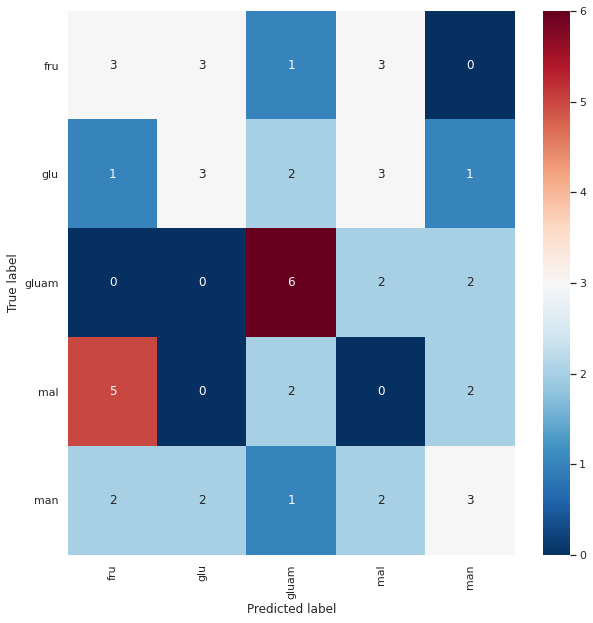

Normalised over true label (rows)


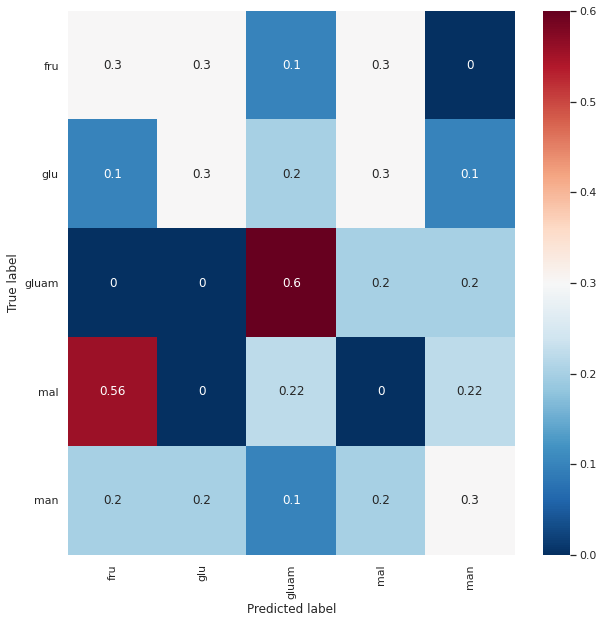

Normalised over pred label (columns)


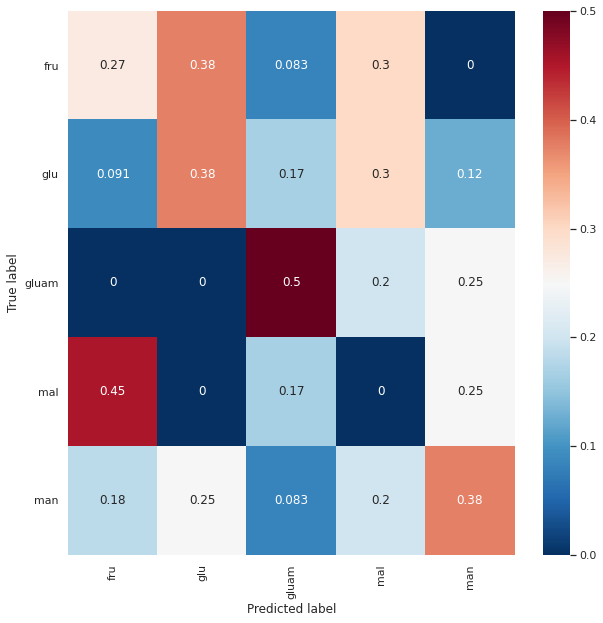

In [46]:
normalisation_methods = OrderedDict({None: '',
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(red_feat_flat_y_true, red_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=red_feat_flat_y_true, y_pred=red_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.show()

##### Comparison of original with reduced dataset 

In [47]:
fixed_params_1 = ml.define_fixed_model_params(SVC())
fixed_params_2 = ml.define_fixed_model_params(LogisticRegression())
params_1 = {**fixed_params_1, **all_feat_random_cv_searches['SVC__no_balancing']['best_outer_loop_params']}
params_2 = {**fixed_params_2, **red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['best_outer_loop_params']}

F, p = ml.run_5x2_CV_paired_t_test(
    x=ml.x, y=ml.y, groups=ml.groups,
    selected_features_1=ml.features, selected_features_2=tree_top_barrels['Feature'].tolist()[:15],
    classifier_1=SVC, classifier_2=LogisticRegression,
    params_1=params_1, params_2=params_2,
    resampling_method_1='no_balancing', resampling_method_2='no_balancing',
    n_components_pca_1=None, n_components_pca_2=None,
    scoring_func='accuracy'
)

In [48]:
print(F, p)

1.8617284837169226 0.2554826347840561


So, no significant difference in performance when reduce number of barrels from 46 to 15.